<a href="https://colab.research.google.com/github/jasmin-baier/BJET_Paper_EdTech_Use_Kenyan_Girls/blob/main/InkubaLM_Instruction_Finetuning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

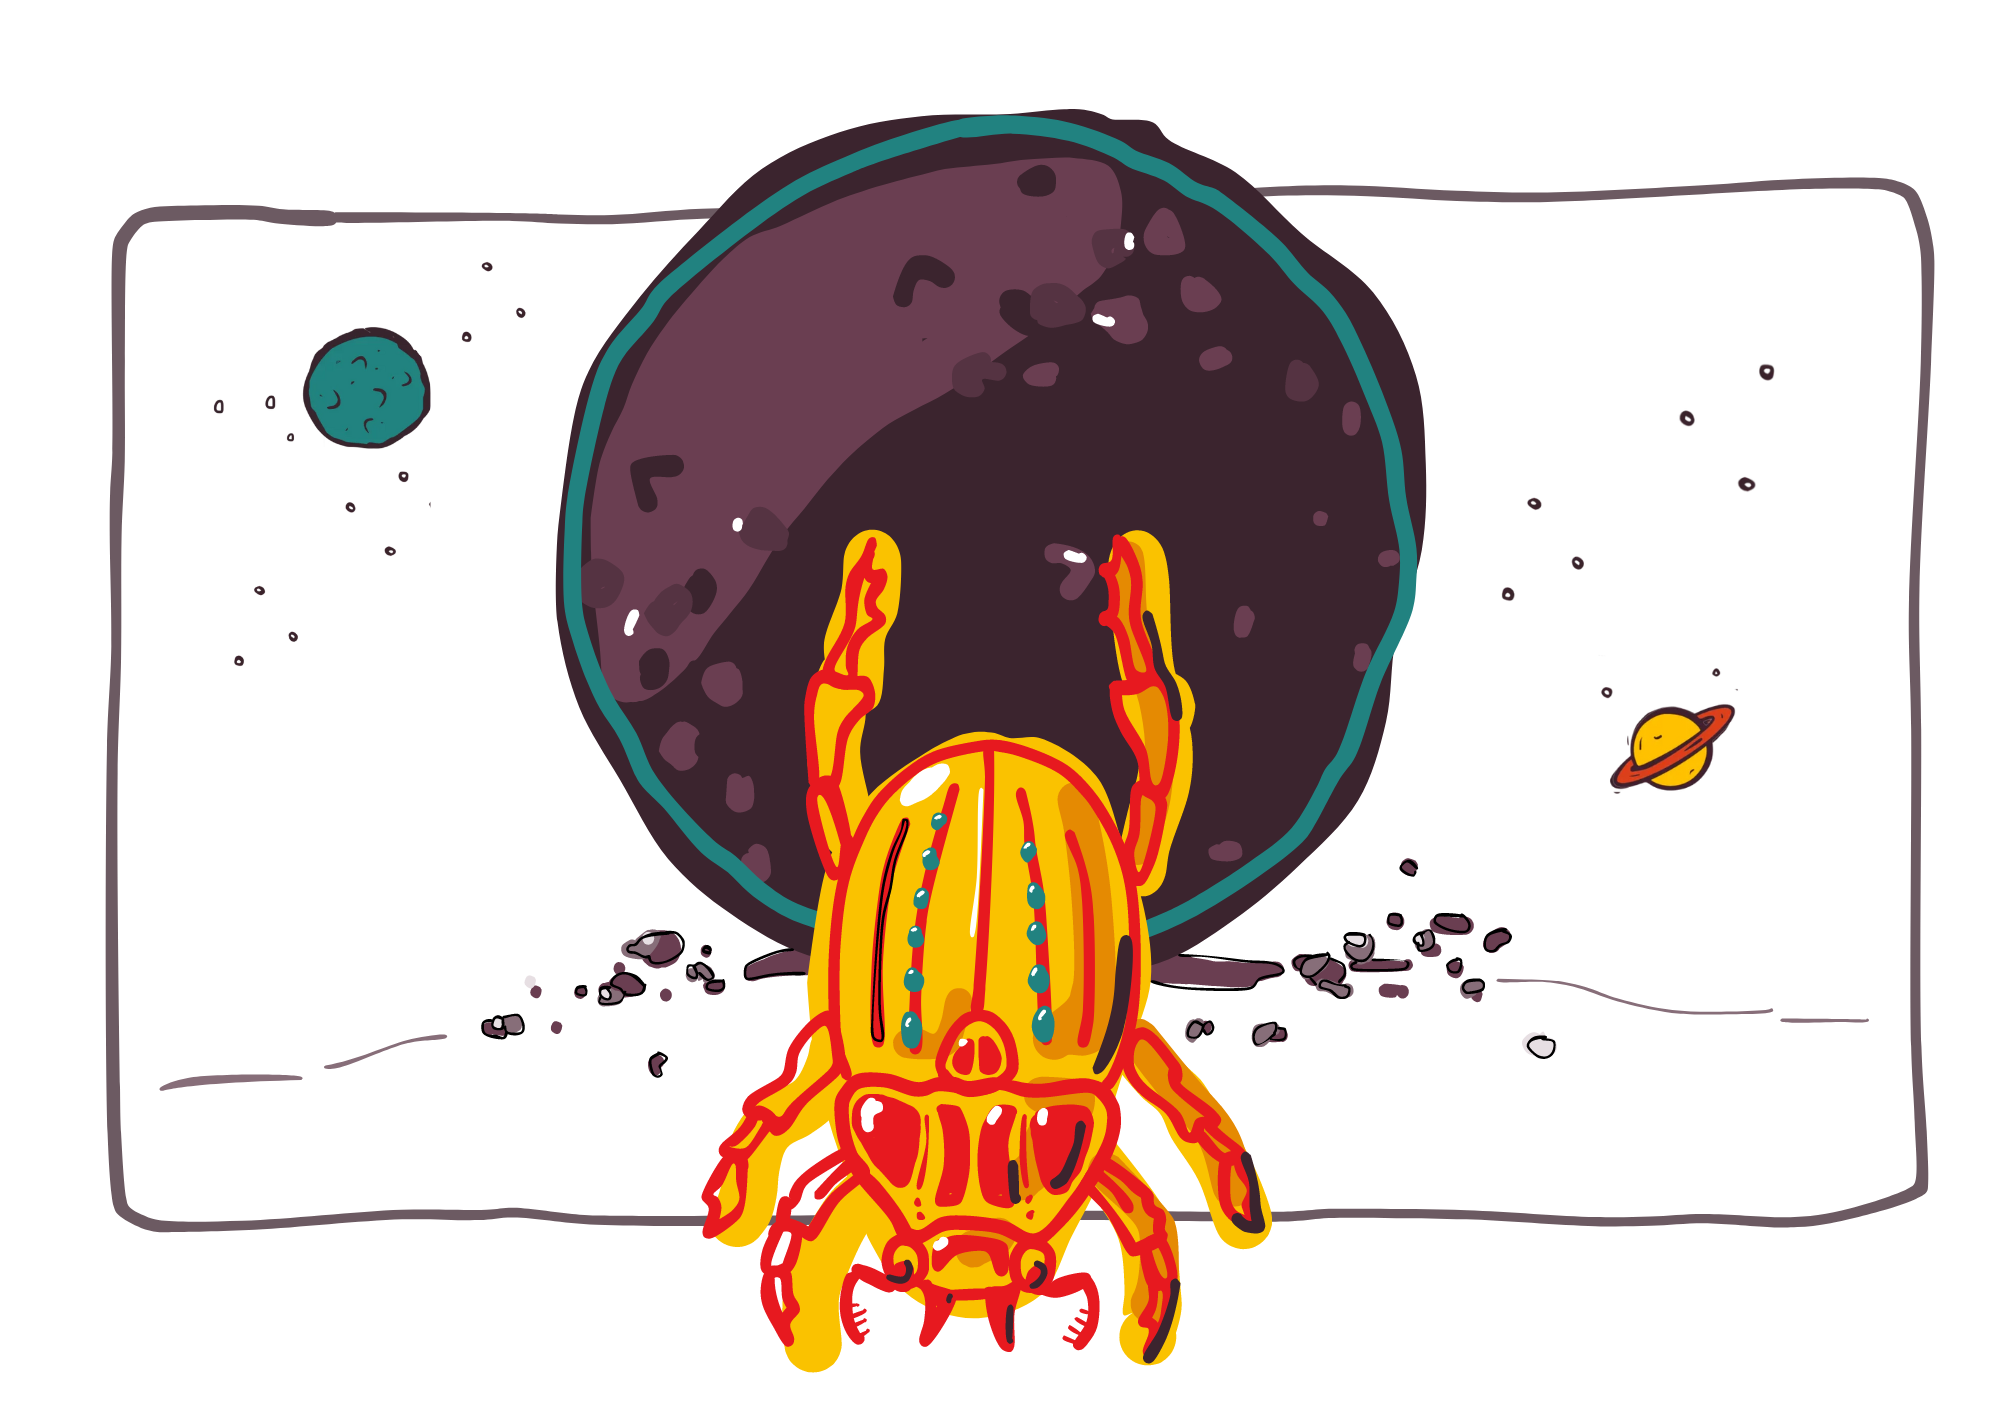

### Recently, we have released our InkubaLM, a highly capable small language model for African Languages. You can read more about it in this [blog post](https://medium.com/@lelapa_ai/inkubalm-a-small-language-model-for-low-resource-african-languages-dc9793842dec). In this notebook, we show how to use our [InkubaLM](https://huggingface.co/lelapa/InkubaLM-0.4B) for instruction finetuning, using our [Inkuba-Instruct](https://huggingface.co/datasets/lelapa/Inkuba-instruct).

### First let us load the dataset. We will focus in this tutorial on `news_classification` task. We invite you to read more about the dataset structure and how we created it, in the [official HuggingFace repository](https://huggingface.co/datasets/lelapa/Inkuba-instruct/blob/main/README.md). Loading the dataset may take some time, given the size of the dataset. Note that this part is optional, it is only meant to play around with the dataset. You can skip directly to the Instruction Finetuning part

In [ ]:
!pip install -U datasets --quiet

In [ ]:
from datasets import load_dataset
inkuba_instruct = load_dataset("lelapa/Inkuba-instruct")

https://huggingface.co/datasets/lelapa/Inkuba-instruct/resolve/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/README.md not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/2a7eef3ff66b652cbf57f6e145d7781f00cf81f65ca244d22712beb6129b84ba.e97d97fd0b7e0810bb62da2e7417f26b127915e7a7ae35c43d07e48294d0c64b.incomplete
INFO:datasets.utils.file_utils:https://huggingface.co/datasets/lelapa/Inkuba-instruct/resolve/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/README.md not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/2a7eef3ff66b652cbf57f6e145d7781f00cf81f65ca244d22712beb6129b84ba.e97d97fd0b7e0810bb62da2e7417f26b127915e7a7ae35c43d07e48294d0c64b.incomplete


storing https://huggingface.co/datasets/lelapa/Inkuba-instruct/resolve/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/README.md in cache at /root/.cache/huggingface/datasets/downloads/2a7eef3ff66b652cbf57f6e145d7781f00cf81f65ca244d22712beb6129b84ba.e97d97fd0b7e0810bb62da2e7417f26b127915e7a7ae35c43d07e48294d0c64b
INFO:datasets.utils.file_utils:storing https://huggingface.co/datasets/lelapa/Inkuba-instruct/resolve/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/README.md in cache at /root/.cache/huggingface/datasets/downloads/2a7eef3ff66b652cbf57f6e145d7781f00cf81f65ca244d22712beb6129b84ba.e97d97fd0b7e0810bb62da2e7417f26b127915e7a7ae35c43d07e48294d0c64b
creating metadata file for /root/.cache/huggingface/datasets/downloads/2a7eef3ff66b652cbf57f6e145d7781f00cf81f65ca244d22712beb6129b84ba.e97d97fd0b7e0810bb62da2e7417f26b127915e7a7ae35c43d07e48294d0c64b
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/2a7eef3ff66b652cbf57f6e145d7781f00cf81f65ca244d227

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Generating dataset inkuba-instruct (/root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab)
INFO:datasets.builder:Generating dataset inkuba-instruct (/root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab)
INFO:datasets.builder:Downloading and preparing dataset inkuba-instruct/default to /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab...
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00000-of-00012.parquet not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/94b51664caf8bbe345b51884ad85a20de34581684ccdc8c8a23c4af672ab2608.incomplete
INFO:datasets.utils.file_utils:hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00000-of-00012.parquet not found in cache or fo

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00000-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/94b51664caf8bbe345b51884ad85a20de34581684ccdc8c8a23c4af672ab2608
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00000-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/94b51664caf8bbe345b51884ad85a20de34581684ccdc8c8a23c4af672ab2608
creating metadata file for /root/.cache/huggingface/datasets/downloads/94b51664caf8bbe345b51884ad85a20de34581684ccdc8c8a23c4af672ab2608
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/94b51664caf8bbe345b51884ad85a20de34581684ccdc8c8a23c4af672ab2608
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00001-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00001-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/962d2cd38af6877854121b163601a9627a56a34649cc31bd50f92331dc41df73
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00001-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/962d2cd38af6877854121b163601a9627a56a34649cc31bd50f92331dc41df73
creating metadata file for /root/.cache/huggingface/datasets/downloads/962d2cd38af6877854121b163601a9627a56a34649cc31bd50f92331dc41df73
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/962d2cd38af6877854121b163601a9627a56a34649cc31bd50f92331dc41df73
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00002-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00002-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/ef665a1866cc3ca19bf5e377087a82406852294af202f79529dee8979be6dbae
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00002-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/ef665a1866cc3ca19bf5e377087a82406852294af202f79529dee8979be6dbae
creating metadata file for /root/.cache/huggingface/datasets/downloads/ef665a1866cc3ca19bf5e377087a82406852294af202f79529dee8979be6dbae
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/ef665a1866cc3ca19bf5e377087a82406852294af202f79529dee8979be6dbae
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00003-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00003-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/e77a906ad7781887ae4a76a486f6f5b1295ae3e464a8b8e5a10bbd86a6a57d6e
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00003-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/e77a906ad7781887ae4a76a486f6f5b1295ae3e464a8b8e5a10bbd86a6a57d6e
creating metadata file for /root/.cache/huggingface/datasets/downloads/e77a906ad7781887ae4a76a486f6f5b1295ae3e464a8b8e5a10bbd86a6a57d6e
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/e77a906ad7781887ae4a76a486f6f5b1295ae3e464a8b8e5a10bbd86a6a57d6e
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00004-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00004-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/445ed0df42c48465b6b54b28e9971953e1c1a32927f958f0a6465fd4967c86e1
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00004-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/445ed0df42c48465b6b54b28e9971953e1c1a32927f958f0a6465fd4967c86e1
creating metadata file for /root/.cache/huggingface/datasets/downloads/445ed0df42c48465b6b54b28e9971953e1c1a32927f958f0a6465fd4967c86e1
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/445ed0df42c48465b6b54b28e9971953e1c1a32927f958f0a6465fd4967c86e1
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00005-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00005-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/cbef3a1bf92ec223472294cb6781930e4c4a94315971d5973d484d34560b0b49
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00005-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/cbef3a1bf92ec223472294cb6781930e4c4a94315971d5973d484d34560b0b49
creating metadata file for /root/.cache/huggingface/datasets/downloads/cbef3a1bf92ec223472294cb6781930e4c4a94315971d5973d484d34560b0b49
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/cbef3a1bf92ec223472294cb6781930e4c4a94315971d5973d484d34560b0b49
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00006-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00006-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/a13d401c7245eb903c10d9c2791b7a71aeb092eb3b25a2566e553386d3252285
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00006-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/a13d401c7245eb903c10d9c2791b7a71aeb092eb3b25a2566e553386d3252285
creating metadata file for /root/.cache/huggingface/datasets/downloads/a13d401c7245eb903c10d9c2791b7a71aeb092eb3b25a2566e553386d3252285
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/a13d401c7245eb903c10d9c2791b7a71aeb092eb3b25a2566e553386d3252285
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00007-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00007-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/4ed5ec0ab569553b1f7c0a2e8f9c76f30f668f8595d45f695adcac1d4bf53966
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00007-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/4ed5ec0ab569553b1f7c0a2e8f9c76f30f668f8595d45f695adcac1d4bf53966
creating metadata file for /root/.cache/huggingface/datasets/downloads/4ed5ec0ab569553b1f7c0a2e8f9c76f30f668f8595d45f695adcac1d4bf53966
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/4ed5ec0ab569553b1f7c0a2e8f9c76f30f668f8595d45f695adcac1d4bf53966
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00008-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00008-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/73d77c2b734aa9c6101875d6e4b6bb866502e089f6a9bb43acb8536b1cf48ab5
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00008-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/73d77c2b734aa9c6101875d6e4b6bb866502e089f6a9bb43acb8536b1cf48ab5
creating metadata file for /root/.cache/huggingface/datasets/downloads/73d77c2b734aa9c6101875d6e4b6bb866502e089f6a9bb43acb8536b1cf48ab5
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/73d77c2b734aa9c6101875d6e4b6bb866502e089f6a9bb43acb8536b1cf48ab5
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00009-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00009-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/92d45c7fdcf582112c7f34ac03d0a256dc63c1b17884a8f51a9e12ce26a59ef1
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00009-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/92d45c7fdcf582112c7f34ac03d0a256dc63c1b17884a8f51a9e12ce26a59ef1
creating metadata file for /root/.cache/huggingface/datasets/downloads/92d45c7fdcf582112c7f34ac03d0a256dc63c1b17884a8f51a9e12ce26a59ef1
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/92d45c7fdcf582112c7f34ac03d0a256dc63c1b17884a8f51a9e12ce26a59ef1
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00010-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00010-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/240ffbb6dd1e1d2b1819fabb8ce9ef0a5b4f7ade80e06da3ef22b79828de3ba8
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00010-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/240ffbb6dd1e1d2b1819fabb8ce9ef0a5b4f7ade80e06da3ef22b79828de3ba8
creating metadata file for /root/.cache/huggingface/datasets/downloads/240ffbb6dd1e1d2b1819fabb8ce9ef0a5b4f7ade80e06da3ef22b79828de3ba8
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/240ffbb6dd1e1d2b1819fabb8ce9ef0a5b4f7ade80e06da3ef22b79828de3ba8
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00011-of-00012.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00011-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/b603f9f45ea90836885abe52ede36168a2cab13a496ad33bf1f66ecfe25917ba
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_dev-00011-of-00012.parquet in cache at /root/.cache/huggingface/datasets/downloads/b603f9f45ea90836885abe52ede36168a2cab13a496ad33bf1f66ecfe25917ba
creating metadata file for /root/.cache/huggingface/datasets/downloads/b603f9f45ea90836885abe52ede36168a2cab13a496ad33bf1f66ecfe25917ba
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/b603f9f45ea90836885abe52ede36168a2cab13a496ad33bf1f66ecfe25917ba


hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_train-00000-of-00027.parquet not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/9c2b2afad38ef1e1d135be833f19241b31d0082f64c675891921cc8ee94cce08.incomplete
INFO:datasets.utils.file_utils:hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_train-00000-of-00027.parquet not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/9c2b2afad38ef1e1d135be833f19241b31d0082f64c675891921cc8ee94cce08.incomplete
storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/english_train-00000-of-00027.parquet in cache at /root/.cache/huggingface/datasets/downloads/9c2b2afad38ef1e1d135be833f19241b31d0082f64c675891921cc8ee94cce08
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_dev-00000-of-00001.parquet in cache at /root/.cache/huggingface/datasets/downloads/27d2b9bdbe39895109ebbf62fe56fcc6f773d9d5c43588e65890f83c4c0a5b0c
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_dev-00000-of-00001.parquet in cache at /root/.cache/huggingface/datasets/downloads/27d2b9bdbe39895109ebbf62fe56fcc6f773d9d5c43588e65890f83c4c0a5b0c
creating metadata file for /root/.cache/huggingface/datasets/downloads/27d2b9bdbe39895109ebbf62fe56fcc6f773d9d5c43588e65890f83c4c0a5b0c
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/27d2b9bdbe39895109ebbf62fe56fcc6f773d9d5c43588e65890f83c4c0a5b0c
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_train-00000-of-00002.parquet not found in cache or force_download set to True, download

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_train-00000-of-00002.parquet in cache at /root/.cache/huggingface/datasets/downloads/09bd3ca9069e8ba0b6a6dbd1de757d407720454e972055f683f5171e9dc34d5c
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_train-00000-of-00002.parquet in cache at /root/.cache/huggingface/datasets/downloads/09bd3ca9069e8ba0b6a6dbd1de757d407720454e972055f683f5171e9dc34d5c
creating metadata file for /root/.cache/huggingface/datasets/downloads/09bd3ca9069e8ba0b6a6dbd1de757d407720454e972055f683f5171e9dc34d5c
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/09bd3ca9069e8ba0b6a6dbd1de757d407720454e972055f683f5171e9dc34d5c
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_train-00001-of-00002.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_train-00001-of-00002.parquet in cache at /root/.cache/huggingface/datasets/downloads/7f5cf12c73290f6cfb88f447350193bd5d449dd75d63e7466776a61394d98b87
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/hausa_train-00001-of-00002.parquet in cache at /root/.cache/huggingface/datasets/downloads/7f5cf12c73290f6cfb88f447350193bd5d449dd75d63e7466776a61394d98b87
creating metadata file for /root/.cache/huggingface/datasets/downloads/7f5cf12c73290f6cfb88f447350193bd5d449dd75d63e7466776a61394d98b87
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/7f5cf12c73290f6cfb88f447350193bd5d449dd75d63e7466776a61394d98b87
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00000-of-00003.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00000-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/f39f366fa35a378ee69fd8311d1ee2b118abefa8f126aca1d39711b0a2095ebb
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00000-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/f39f366fa35a378ee69fd8311d1ee2b118abefa8f126aca1d39711b0a2095ebb
creating metadata file for /root/.cache/huggingface/datasets/downloads/f39f366fa35a378ee69fd8311d1ee2b118abefa8f126aca1d39711b0a2095ebb
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/f39f366fa35a378ee69fd8311d1ee2b118abefa8f126aca1d39711b0a2095ebb
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00001-of-00003.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00001-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/78258b41e220a785bce731a554253e8d5b5a929bbd0e0540c90cc55097665a70
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00001-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/78258b41e220a785bce731a554253e8d5b5a929bbd0e0540c90cc55097665a70
creating metadata file for /root/.cache/huggingface/datasets/downloads/78258b41e220a785bce731a554253e8d5b5a929bbd0e0540c90cc55097665a70
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/78258b41e220a785bce731a554253e8d5b5a929bbd0e0540c90cc55097665a70
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00002-of-00003.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00002-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/363f20c855340d609be438516472d173a5324f4c1ae6a8921c99de05b9e90e46
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_dev-00002-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/363f20c855340d609be438516472d173a5324f4c1ae6a8921c99de05b9e90e46
creating metadata file for /root/.cache/huggingface/datasets/downloads/363f20c855340d609be438516472d173a5324f4c1ae6a8921c99de05b9e90e46
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/363f20c855340d609be438516472d173a5324f4c1ae6a8921c99de05b9e90e46
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00000-of-00006.parquet not found in cache or force_download set to True, do

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00000-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/f3bc83882b15608f85ff68e3d01c6adda2b03290cb0e4678b38aa13932a9963e
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00000-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/f3bc83882b15608f85ff68e3d01c6adda2b03290cb0e4678b38aa13932a9963e
creating metadata file for /root/.cache/huggingface/datasets/downloads/f3bc83882b15608f85ff68e3d01c6adda2b03290cb0e4678b38aa13932a9963e
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/f3bc83882b15608f85ff68e3d01c6adda2b03290cb0e4678b38aa13932a9963e
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00001-of-00006.parquet not found in cache or force_download set to True

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00001-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/73e189f504961a51d87459b1e51a7182383e18197410a479f38b9dd363d1010a
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00001-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/73e189f504961a51d87459b1e51a7182383e18197410a479f38b9dd363d1010a
creating metadata file for /root/.cache/huggingface/datasets/downloads/73e189f504961a51d87459b1e51a7182383e18197410a479f38b9dd363d1010a
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/73e189f504961a51d87459b1e51a7182383e18197410a479f38b9dd363d1010a
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00002-of-00006.parquet not found in cache or force_download set to True

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00002-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/1ebe4276a7d5bcc344082e97b40220157d8f728485a705cbbe313818bed88348
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00002-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/1ebe4276a7d5bcc344082e97b40220157d8f728485a705cbbe313818bed88348
creating metadata file for /root/.cache/huggingface/datasets/downloads/1ebe4276a7d5bcc344082e97b40220157d8f728485a705cbbe313818bed88348
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/1ebe4276a7d5bcc344082e97b40220157d8f728485a705cbbe313818bed88348
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00003-of-00006.parquet not found in cache or force_download set to True

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00003-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/ba32930437f41c582315d7796a3cc225335ad5d67aa6309765fbf8fe29381f24
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00003-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/ba32930437f41c582315d7796a3cc225335ad5d67aa6309765fbf8fe29381f24
creating metadata file for /root/.cache/huggingface/datasets/downloads/ba32930437f41c582315d7796a3cc225335ad5d67aa6309765fbf8fe29381f24
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/ba32930437f41c582315d7796a3cc225335ad5d67aa6309765fbf8fe29381f24
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00004-of-00006.parquet not found in cache or force_download set to True

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00004-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/0f1030169934b23953c668654443c14e62876446dd1316fe2457cc1f06139c4b
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00004-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/0f1030169934b23953c668654443c14e62876446dd1316fe2457cc1f06139c4b
creating metadata file for /root/.cache/huggingface/datasets/downloads/0f1030169934b23953c668654443c14e62876446dd1316fe2457cc1f06139c4b
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/0f1030169934b23953c668654443c14e62876446dd1316fe2457cc1f06139c4b
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00005-of-00006.parquet not found in cache or force_download set to True

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00005-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/68e28e9b1fb53f8d0d8d16f2b2cda1d1dd39197bc7a8200b4da27ce7feac63f3
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/isizulu_train-00005-of-00006.parquet in cache at /root/.cache/huggingface/datasets/downloads/68e28e9b1fb53f8d0d8d16f2b2cda1d1dd39197bc7a8200b4da27ce7feac63f3
creating metadata file for /root/.cache/huggingface/datasets/downloads/68e28e9b1fb53f8d0d8d16f2b2cda1d1dd39197bc7a8200b4da27ce7feac63f3
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/68e28e9b1fb53f8d0d8d16f2b2cda1d1dd39197bc7a8200b4da27ce7feac63f3
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00000-of-00008.parquet not found in cache or force_download set to True, 

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00000-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/45e308ec197127d00dfc22a97a50c5432768fde1ecdda24a7f7b13b73cf26ffe
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00000-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/45e308ec197127d00dfc22a97a50c5432768fde1ecdda24a7f7b13b73cf26ffe
creating metadata file for /root/.cache/huggingface/datasets/downloads/45e308ec197127d00dfc22a97a50c5432768fde1ecdda24a7f7b13b73cf26ffe
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/45e308ec197127d00dfc22a97a50c5432768fde1ecdda24a7f7b13b73cf26ffe
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00001-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00001-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/359a44df5b2c1ab24ebbc4aeb0022883268a0a4f76d5579b944586955eb0ea89
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00001-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/359a44df5b2c1ab24ebbc4aeb0022883268a0a4f76d5579b944586955eb0ea89
creating metadata file for /root/.cache/huggingface/datasets/downloads/359a44df5b2c1ab24ebbc4aeb0022883268a0a4f76d5579b944586955eb0ea89
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/359a44df5b2c1ab24ebbc4aeb0022883268a0a4f76d5579b944586955eb0ea89
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00002-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00002-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/ab5ba437c98bb85d46f11581f7b4fd7a72db40a3a7f83192a1d3ba796559c0b1
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00002-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/ab5ba437c98bb85d46f11581f7b4fd7a72db40a3a7f83192a1d3ba796559c0b1
creating metadata file for /root/.cache/huggingface/datasets/downloads/ab5ba437c98bb85d46f11581f7b4fd7a72db40a3a7f83192a1d3ba796559c0b1
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/ab5ba437c98bb85d46f11581f7b4fd7a72db40a3a7f83192a1d3ba796559c0b1
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00003-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00003-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/a58367271ae89fa62e7b897a822e4cca15354d3af8b6b88177611e4c95804639
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00003-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/a58367271ae89fa62e7b897a822e4cca15354d3af8b6b88177611e4c95804639
creating metadata file for /root/.cache/huggingface/datasets/downloads/a58367271ae89fa62e7b897a822e4cca15354d3af8b6b88177611e4c95804639
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/a58367271ae89fa62e7b897a822e4cca15354d3af8b6b88177611e4c95804639
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00004-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00004-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/8baade09d5cd29ae47a9837d02ea948155f428a98cc5c5f080cd18a15d6b72ab
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00004-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/8baade09d5cd29ae47a9837d02ea948155f428a98cc5c5f080cd18a15d6b72ab
creating metadata file for /root/.cache/huggingface/datasets/downloads/8baade09d5cd29ae47a9837d02ea948155f428a98cc5c5f080cd18a15d6b72ab
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/8baade09d5cd29ae47a9837d02ea948155f428a98cc5c5f080cd18a15d6b72ab
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00005-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00005-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/49f6431f30e73fa11a0daed2e54a2e4a512c7013715ae724306783792a5a036f
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00005-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/49f6431f30e73fa11a0daed2e54a2e4a512c7013715ae724306783792a5a036f
creating metadata file for /root/.cache/huggingface/datasets/downloads/49f6431f30e73fa11a0daed2e54a2e4a512c7013715ae724306783792a5a036f
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/49f6431f30e73fa11a0daed2e54a2e4a512c7013715ae724306783792a5a036f
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00006-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00006-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/5b9729473df39b952bd02fab4a6b8865d02531351524c122c9b27239d6d6f9fb
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00006-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/5b9729473df39b952bd02fab4a6b8865d02531351524c122c9b27239d6d6f9fb
creating metadata file for /root/.cache/huggingface/datasets/downloads/5b9729473df39b952bd02fab4a6b8865d02531351524c122c9b27239d6d6f9fb
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/5b9729473df39b952bd02fab4a6b8865d02531351524c122c9b27239d6d6f9fb
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00007-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00007-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/199c5202dcb626fe1eb6889dd10e322187766004152766be7944db3ea3ef99ff
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_dev-00007-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/199c5202dcb626fe1eb6889dd10e322187766004152766be7944db3ea3ef99ff
creating metadata file for /root/.cache/huggingface/datasets/downloads/199c5202dcb626fe1eb6889dd10e322187766004152766be7944db3ea3ef99ff
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/199c5202dcb626fe1eb6889dd10e322187766004152766be7944db3ea3ef99ff


hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_train-00000-of-00019.parquet not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/2993697b13ec3c7db5bc6cea0f750f1efa290a50db2a8f4532acf49d6c543df1.incomplete
INFO:datasets.utils.file_utils:hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_train-00000-of-00019.parquet not found in cache or force_download set to True, downloading to /root/.cache/huggingface/datasets/downloads/2993697b13ec3c7db5bc6cea0f750f1efa290a50db2a8f4532acf49d6c543df1.incomplete
storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/swahili_train-00000-of-00019.parquet in cache at /root/.cache/huggingface/datasets/downloads/2993697b13ec3c7db5bc6cea0f750f1efa290a50db2a8f4532acf49d6c543df1
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00000-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/a346e13ef62893ef17191fc44bf59b0124e85684bf09daf244d65dc71f265c1d
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00000-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/a346e13ef62893ef17191fc44bf59b0124e85684bf09daf244d65dc71f265c1d
creating metadata file for /root/.cache/huggingface/datasets/downloads/a346e13ef62893ef17191fc44bf59b0124e85684bf09daf244d65dc71f265c1d
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/a346e13ef62893ef17191fc44bf59b0124e85684bf09daf244d65dc71f265c1d
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00001-of-00004.parquet not found in cache or force_download set to True, downloadin

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00001-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/389f3d13f3371207d651a731f8331107fca9556d10d6561327b14f927b6f2ab0
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00001-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/389f3d13f3371207d651a731f8331107fca9556d10d6561327b14f927b6f2ab0
creating metadata file for /root/.cache/huggingface/datasets/downloads/389f3d13f3371207d651a731f8331107fca9556d10d6561327b14f927b6f2ab0
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/389f3d13f3371207d651a731f8331107fca9556d10d6561327b14f927b6f2ab0
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00002-of-00004.parquet not found in cache or force_download set to True, downloadin

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00002-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/773819cd4ba2d0d75a514fe6931d090af06f869682cdaddb6e2105446eef94ba
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00002-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/773819cd4ba2d0d75a514fe6931d090af06f869682cdaddb6e2105446eef94ba
creating metadata file for /root/.cache/huggingface/datasets/downloads/773819cd4ba2d0d75a514fe6931d090af06f869682cdaddb6e2105446eef94ba
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/773819cd4ba2d0d75a514fe6931d090af06f869682cdaddb6e2105446eef94ba
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00003-of-00004.parquet not found in cache or force_download set to True, downloadin

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00003-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/c13705a836872a26850d4999e4a7d6692f0580f033700b4e49c1ac471df0adf9
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_dev-00003-of-00004.parquet in cache at /root/.cache/huggingface/datasets/downloads/c13705a836872a26850d4999e4a7d6692f0580f033700b4e49c1ac471df0adf9
creating metadata file for /root/.cache/huggingface/datasets/downloads/c13705a836872a26850d4999e4a7d6692f0580f033700b4e49c1ac471df0adf9
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/c13705a836872a26850d4999e4a7d6692f0580f033700b4e49c1ac471df0adf9
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00000-of-00008.parquet not found in cache or force_download set to True, download

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00000-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/697e361d1a5976851877f4a4ba1bbd6d720c364252abd086f697dd0379024dd5
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00000-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/697e361d1a5976851877f4a4ba1bbd6d720c364252abd086f697dd0379024dd5
creating metadata file for /root/.cache/huggingface/datasets/downloads/697e361d1a5976851877f4a4ba1bbd6d720c364252abd086f697dd0379024dd5
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/697e361d1a5976851877f4a4ba1bbd6d720c364252abd086f697dd0379024dd5
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00001-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00001-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/7ca1dac4582292baa5f1fe981d316e79747b3c0e1943da365c801efe6e3976a7
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00001-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/7ca1dac4582292baa5f1fe981d316e79747b3c0e1943da365c801efe6e3976a7
creating metadata file for /root/.cache/huggingface/datasets/downloads/7ca1dac4582292baa5f1fe981d316e79747b3c0e1943da365c801efe6e3976a7
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/7ca1dac4582292baa5f1fe981d316e79747b3c0e1943da365c801efe6e3976a7
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00002-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00002-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/d11593da40b8dc636d72a5ee723f42999d11b516c0e32c7ba9be3af87c7fded9
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00002-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/d11593da40b8dc636d72a5ee723f42999d11b516c0e32c7ba9be3af87c7fded9
creating metadata file for /root/.cache/huggingface/datasets/downloads/d11593da40b8dc636d72a5ee723f42999d11b516c0e32c7ba9be3af87c7fded9
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/d11593da40b8dc636d72a5ee723f42999d11b516c0e32c7ba9be3af87c7fded9
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00003-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00003-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/ef3e29b24dc34bf8067df31052b30b8dc74d7526dd5383728026d5b9c791e393
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00003-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/ef3e29b24dc34bf8067df31052b30b8dc74d7526dd5383728026d5b9c791e393
creating metadata file for /root/.cache/huggingface/datasets/downloads/ef3e29b24dc34bf8067df31052b30b8dc74d7526dd5383728026d5b9c791e393
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/ef3e29b24dc34bf8067df31052b30b8dc74d7526dd5383728026d5b9c791e393
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00004-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00004-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/b5d9183c9b34ed7512aad63273ec685e1c592d7ccbce5987fb991c9ea3e8c51a
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00004-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/b5d9183c9b34ed7512aad63273ec685e1c592d7ccbce5987fb991c9ea3e8c51a
creating metadata file for /root/.cache/huggingface/datasets/downloads/b5d9183c9b34ed7512aad63273ec685e1c592d7ccbce5987fb991c9ea3e8c51a
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/b5d9183c9b34ed7512aad63273ec685e1c592d7ccbce5987fb991c9ea3e8c51a
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00005-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00005-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/8cd851c46fd789bbd139905dc07a9948fbe7b60e1013c571ff511e8deab9edb1
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00005-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/8cd851c46fd789bbd139905dc07a9948fbe7b60e1013c571ff511e8deab9edb1
creating metadata file for /root/.cache/huggingface/datasets/downloads/8cd851c46fd789bbd139905dc07a9948fbe7b60e1013c571ff511e8deab9edb1
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/8cd851c46fd789bbd139905dc07a9948fbe7b60e1013c571ff511e8deab9edb1
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00006-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00006-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/31269a3c0fff1182091df53077d075ede690a77c068f6c873107fca867d5e657
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00006-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/31269a3c0fff1182091df53077d075ede690a77c068f6c873107fca867d5e657
creating metadata file for /root/.cache/huggingface/datasets/downloads/31269a3c0fff1182091df53077d075ede690a77c068f6c873107fca867d5e657
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/31269a3c0fff1182091df53077d075ede690a77c068f6c873107fca867d5e657
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00007-of-00008.parquet not found in cache or force_download set to True, down

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00007-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/f7b8b984300bb511625487eb047f21f02e4a41712500c61112bbcc0ebb5bddfb
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/xhosa_train-00007-of-00008.parquet in cache at /root/.cache/huggingface/datasets/downloads/f7b8b984300bb511625487eb047f21f02e4a41712500c61112bbcc0ebb5bddfb
creating metadata file for /root/.cache/huggingface/datasets/downloads/f7b8b984300bb511625487eb047f21f02e4a41712500c61112bbcc0ebb5bddfb
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/f7b8b984300bb511625487eb047f21f02e4a41712500c61112bbcc0ebb5bddfb
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_dev-00000-of-00001.parquet not found in cache or force_download set to True, downl

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_dev-00000-of-00001.parquet in cache at /root/.cache/huggingface/datasets/downloads/0985dd96441fc2d2d1528c7acac643a1fee493b71577c1a71b4502b35dae80d7
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_dev-00000-of-00001.parquet in cache at /root/.cache/huggingface/datasets/downloads/0985dd96441fc2d2d1528c7acac643a1fee493b71577c1a71b4502b35dae80d7
creating metadata file for /root/.cache/huggingface/datasets/downloads/0985dd96441fc2d2d1528c7acac643a1fee493b71577c1a71b4502b35dae80d7
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/0985dd96441fc2d2d1528c7acac643a1fee493b71577c1a71b4502b35dae80d7
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00000-of-00003.parquet not found in cache or force_download set to True, downl

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00000-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/8db6f5b7a5ca6c023a63d2ae3e5e8d1f13b5cfa62f54c241fd3cf4df5ea4b6e6
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00000-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/8db6f5b7a5ca6c023a63d2ae3e5e8d1f13b5cfa62f54c241fd3cf4df5ea4b6e6
creating metadata file for /root/.cache/huggingface/datasets/downloads/8db6f5b7a5ca6c023a63d2ae3e5e8d1f13b5cfa62f54c241fd3cf4df5ea4b6e6
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/8db6f5b7a5ca6c023a63d2ae3e5e8d1f13b5cfa62f54c241fd3cf4df5ea4b6e6
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00001-of-00003.parquet not found in cache or force_download set to True, d

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00001-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/7862c57c57c45265e18bb17b8379da9a5d54578b850b9568487ac5a65b123f7e
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00001-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/7862c57c57c45265e18bb17b8379da9a5d54578b850b9568487ac5a65b123f7e
creating metadata file for /root/.cache/huggingface/datasets/downloads/7862c57c57c45265e18bb17b8379da9a5d54578b850b9568487ac5a65b123f7e
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/7862c57c57c45265e18bb17b8379da9a5d54578b850b9568487ac5a65b123f7e
hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00002-of-00003.parquet not found in cache or force_download set to True, d

storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00002-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/e1ec674ff15692503bf6019177acf5bf899aa5b27c2955c21e1a023501661506
INFO:datasets.utils.file_utils:storing hf://datasets/lelapa/Inkuba-instruct@f3900e7cf7ab5492b6d42957ff912a422d9f32ab/data/yoruba_train-00002-of-00003.parquet in cache at /root/.cache/huggingface/datasets/downloads/e1ec674ff15692503bf6019177acf5bf899aa5b27c2955c21e1a023501661506
creating metadata file for /root/.cache/huggingface/datasets/downloads/e1ec674ff15692503bf6019177acf5bf899aa5b27c2955c21e1a023501661506
INFO:datasets.utils.file_utils:creating metadata file for /root/.cache/huggingface/datasets/downloads/e1ec674ff15692503bf6019177acf5bf899aa5b27c2955c21e1a023501661506
INFO:datasets.download.download_manager:Downloading took 3.0 min
Checksum Computation took 0.0 min
INFO:datasets.download.download_manager:Checksum Computation took 0.0 m

Generating english_dev split:   0%|          | 0/28625196 [00:00<?, ? examples/s]

Generating english_train split
INFO:datasets.builder:Generating english_train split


Generating english_train split:   0%|          | 0/66792124 [00:00<?, ? examples/s]

Generating hausa_dev split
INFO:datasets.builder:Generating hausa_dev split


Generating hausa_dev split:   0%|          | 0/1734811 [00:00<?, ? examples/s]

Generating hausa_train split
INFO:datasets.builder:Generating hausa_train split


Generating hausa_train split:   0%|          | 0/4047890 [00:00<?, ? examples/s]

Generating isizulu_dev split
INFO:datasets.builder:Generating isizulu_dev split


Generating isizulu_dev split:   0%|          | 0/4859598 [00:00<?, ? examples/s]

Generating isizulu_train split
INFO:datasets.builder:Generating isizulu_train split


Generating isizulu_train split:   0%|          | 0/11339060 [00:00<?, ? examples/s]

Generating swahili_dev split
INFO:datasets.builder:Generating swahili_dev split


Generating swahili_dev split:   0%|          | 0/18722979 [00:00<?, ? examples/s]

Generating swahili_train split
INFO:datasets.builder:Generating swahili_train split


Generating swahili_train split:   0%|          | 0/43686951 [00:00<?, ? examples/s]

Generating xhosa_dev split
INFO:datasets.builder:Generating xhosa_dev split


Generating xhosa_dev split:   0%|          | 0/7607786 [00:00<?, ? examples/s]

Generating xhosa_train split
INFO:datasets.builder:Generating xhosa_train split


Generating xhosa_train split:   0%|          | 0/17751499 [00:00<?, ? examples/s]

Generating yoruba_dev split
INFO:datasets.builder:Generating yoruba_dev split


Generating yoruba_dev split:   0%|          | 0/1918855 [00:00<?, ? examples/s]

Generating yoruba_train split
INFO:datasets.builder:Generating yoruba_train split


Generating yoruba_train split:   0%|          | 0/4477327 [00:00<?, ? examples/s]

All the splits matched successfully.
INFO:datasets.utils.info_utils:All the splits matched successfully.
Dataset inkuba-instruct downloaded and prepared to /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab. Subsequent calls will reuse this data.
INFO:datasets.builder:Dataset inkuba-instruct downloaded and prepared to /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab. Subsequent calls will reuse this data.


Loading dataset shards:   0%|          | 0/27 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
# Define the specific task you're interested in
specific_task = 'news_classification'  # Replace with the task you want to filter by
# Use the filter method to select samples for the specific task
news_classification_dataset = inkuba_instruct.filter(lambda example: example['task'] == specific_task)

Filter:   0%|          | 0/28625196 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-6de4643c162b9239.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-6de4643c162b9239.arrow


Filter:   0%|          | 0/66792124 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-f3d935c61801fe4a.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-f3d935c61801fe4a.arrow


Filter:   0%|          | 0/1734811 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-2a2922885c400b65.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-2a2922885c400b65.arrow


Filter:   0%|          | 0/4047890 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-82e4639a8615f350.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-82e4639a8615f350.arrow


Filter:   0%|          | 0/4859598 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-ee12a2bb9c1d48f2.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-ee12a2bb9c1d48f2.arrow


Filter:   0%|          | 0/11339060 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-59cf371cab5b3da1.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-59cf371cab5b3da1.arrow


Filter:   0%|          | 0/18722979 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-ef579e81fe00875d.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-ef579e81fe00875d.arrow


Filter:   0%|          | 0/43686951 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-16cbd71214dcd593.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-16cbd71214dcd593.arrow


Filter:   0%|          | 0/7607786 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-733fecdf4728a4e3.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-733fecdf4728a4e3.arrow


Filter:   0%|          | 0/17751499 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-dc81866caa0d7aaf.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-dc81866caa0d7aaf.arrow


Filter:   0%|          | 0/1918855 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-51bf740f43fa761a.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-51bf740f43fa761a.arrow


Filter:   0%|          | 0/4477327 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-899946d9d2b06bf8.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-899946d9d2b06bf8.arrow


### Let us first build functions that will help us tokenize the instruction dataset

In [ ]:
import logging
from datasets import load_dataset, concatenate_datasets, DatasetDict, Dataset
from multiprocessing import cpu_count, set_start_method
import dill
from transformers import LlamaTokenizer
from torch.utils.data import DataLoader
from tqdm import tqdm

set_start_method('spawn', force=True)

import datasets
datasets.utils.py_utils.DEFAULT_EVAL_FUNC = dill.dumps

PROMPT_TEMPLATE= "Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n ### Instruction: {}\n\n ### Response: "
IGNORE_INDEX = -100
logger = logging.getLogger('__name__')

def load_language_dataset(dataset, language):
    return (dataset[f'{language}_train'], dataset[f'{language}_dev'])

def remove_none_entries(dataset, columns):
    def is_not_none(example):
        return all(example[column] is not None for column in columns)
    filtered_dataset = dataset.filter(is_not_none)
    return filtered_dataset

def tokenization(examples, tokenizer, max_seq_length):
    sources = []
    targets = []
    template = PROMPT_TEMPLATE

    for instruction, input_text, output in zip(examples['instruction'], examples['inputs'], examples['targets']):
        if (input_text is not None and input_text != "") and (instruction is not None and instruction != ""):
            instruction = instruction.strip().lower() + "\n" + input_text.strip().lower()
            source = template.format(instruction)
            target = output
            sources.append(source)
            targets.append(target)

    model_inputs = tokenizer(sources, max_length=max_seq_length, truncation=True, padding="max_length")
    labels = tokenizer(targets, max_length=max_seq_length, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    del labels
    return model_inputs

# Function to check if a split has samples for the specific task
def has_samples_for_task(split):
    return len(split) > 0

def run_tokenization(dataset, tokenizer, max_seq_length):

    # Remove splits with no samples for the specific task
    filtered_splits = {split_name: split for split_name, split in news_classification_dataset.items() if has_samples_for_task(split)}

    # Print the splits with samples for the specific task
    for split_name, split in filtered_splits.items():
        print(f'Split "{split_name}" has {len(split)} samples for task "{specific_task}".')

    # Combine all datasets into a single DatasetDict
    all_datasets = DatasetDict()
    languages = ["swahili", "hausa", "yoruba"]
    datasets = [load_language_dataset(dataset, language) for language in languages]

    # Separate train, dev, and test sets splits
    train_sets, dev_sets = zip(*datasets)

    train_sets = [train_set for train_set in train_sets if len(train_set) > 0]
    dev_sets = [dev_set for dev_set in dev_sets if len(dev_set) > 0]

    train_concatenated = concatenate_datasets(train_sets)
    dev_concatenated = concatenate_datasets(dev_sets)

    columns_to_check = ['instruction', 'inputs', 'targets']

    # Remove None type entries
    train_concatenated = remove_none_entries(train_concatenated, columns_to_check)
    dev_concatenated = remove_none_entries(dev_concatenated, columns_to_check)

    logging.warning("Building and Tokenizing Train Dataset...")
    train_tokenized = train_concatenated.map(tokenization,
                            batched=True,
                            batch_size=1024,
                            keep_in_memory=True,
                            num_proc=8,
                            remove_columns=["instruction", "inputs", "targets", "task", "data_source"],
                            load_from_cache_file=False, cache_file_name=None,
                            fn_kwargs={'tokenizer': tokenizer, 'max_seq_length': max_seq_length})
    all_datasets["train"] = train_tokenized
    del train_tokenized, train_concatenated

    logging.warning("Building and Tokenizing Dev Dataset...")
    dev_tokenized = dev_concatenated.map(tokenization,
                            batched=True,
                            batch_size=1024,
                            keep_in_memory=True,
                            num_proc=8,
                            remove_columns=["instruction", "inputs", "targets", "task", "data_source"],
                            load_from_cache_file=False, cache_file_name=None,
                            fn_kwargs={'tokenizer': tokenizer, 'max_seq_length': max_seq_length})

    all_datasets["validation"] = dev_tokenized
    del dev_concatenated, dev_tokenized

    return all_datasets

### Now let us do some coding and put everything together. This will be for the instruction finetuning part

In [ ]:
!pip install -U wandb peft --quiet

In [ ]:
# python_code =

#!/usr/bin/env python
# coding=utf-8
# Copyright 2020 The HuggingFace Inc. team. All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Fine-tuning the library models for causal language modeling (GPT, GPT-2, CTRL, ...) on a text file or a dataset.

# Here is the full list of checkpoints on the hub that can be fine-tuned by this script:
# https://huggingface.co/models?filter=text-generation

# You can also adapt this script on your own causal language modeling task. Pointers for this are left as comments.

import logging
import math
import torch.distributed as dist
import os
import wandb
import sys
from dataclasses import dataclass, field
from typing import Optional
from pathlib import Path
import datasets
import torch
import requests
from transformers import DataCollatorForSeq2Seq
from datasets import load_dataset
import transformers
from transformers import (
    CONFIG_MAPPING,
    AutoConfig,
    BitsAndBytesConfig,
    LlamaForCausalLM,
    LlamaTokenizer,
    AutoTokenizer,
    AutoModelForCausalLM,
    HfArgumentParser,
    Trainer,
    TrainingArguments,
    set_seed,
)

from transformers.trainer_utils import get_last_checkpoint
from transformers.utils import check_min_version, send_example_telemetry
from transformers.utils.versions import require_version
from datasets import load_dataset, concatenate_datasets, DatasetDict, Dataset

from peft import LoraConfig, TaskType, get_peft_model, PeftModel, get_peft_model_state_dict, prepare_model_for_kbit_training
from transformers.trainer_utils import PREFIX_CHECKPOINT_DIR

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

num_gpus = [i for i in range(torch.cuda.device_count())]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Will error if the minimal version of Transformers is not installed. Remove at your own risks.
check_min_version("4.40.0")
require_version("datasets>=1.8.0", "To fix: pip install -r examples/pytorch/language-modeling/requirements.txt")

class SavePeftModelCallback(transformers.TrainerCallback):
    def save_model(self, args, state, kwargs):
        if state.best_model_checkpoint is not None:
            checkpoint_folder = os.path.join(state.best_model_checkpoint, "sft_lora_model")
        else:
            checkpoint_folder = os.path.join(args.output_dir, f"{PREFIX_CHECKPOINT_DIR}-{state.global_step}")

        peft_model_path = os.path.join(checkpoint_folder, "sft_lora_model")
        kwargs["model"].save_pretrained(peft_model_path)
        kwargs["tokenizer"].save_pretrained(peft_model_path)

    def on_save(self, args, state, control, **kwargs):
        self.save_model(args, state, kwargs)
        return control

    def on_train_end(self, args, state, control, **kwargs):
        peft_model_path = os.path.join(args.output_dir, "sft_lora_model")
        kwargs["model"].save_pretrained(peft_model_path)
        kwargs["tokenizer"].save_pretrained(peft_model_path)

@dataclass
class ModelArguments:
    model_name_or_path: Optional[str] = field(
        default="lelapa/InkubaLM-0.4B",
        metadata={
            "help": (
                "The model checkpoint for weights initialization.Don't set if you want to train a model from scratch."
            )
        },
    )
    tokenizer_name_or_path: Optional[str] = field(
        default="lelapa/InkubaLM-0.4B",
        metadata={
            "help": (
                "The tokenizer for weights initialization.Don't set if you want to train a model from scratch."
            )
        },
    )

    config_overrides: Optional[str] = field(
        default=None,
        metadata={
            "help": (
                "Override some existing default config settings when a model is trained from scratch. Example: "
                "n_embd=10,resid_pdrop=0.2,scale_attn_weights=false,summary_type=cls_index"
            )
        },
    )
    config_name: Optional[str] = field(
        default=None, metadata={"help": "Pretrained config name or path if not the same as model_name"}
    )
    tokenizer_name: Optional[str] = field(
        default=None, metadata={"help": "Pretrained tokenizer name or path if not the same as model_name"}
    )
    cache_dir: Optional[str] = field(
        default=None,
        metadata={"help": "Where do you want to store the pretrained models downloaded from huggingface.co"},
    )
    use_fast_tokenizer: bool = field(
        default=True,
        metadata={"help": "Whether to use one of the fast tokenizer (backed by the tokenizers library) or not."},
    )
    model_revision: str = field(
        default="main",
        metadata={"help": "The specific model version to use (can be a branch name, tag name or commit id)."},
    )
    use_auth_token: bool = field(
        default=False,
        metadata={
            "help": (
                "Will use the token generated when running `huggingface-cli login` (necessary to use this script "
                "with private models)."
            )
        },
    )
    torch_dtype: Optional[str] = field(
        default="bfloat16",
        metadata={
            "help": (
                "Override the default `torch.dtype` and load the model under this dtype. If `auto` is passed, the "
                "dtype will be automatically derived from the model's weights."
            ),
            "choices": ["auto", "bfloat16", "float16", "float32"],
        },
    )
    low_cpu_mem_usage: bool = field(
        default=True,
        metadata={
            "help": (
                "It is an option to create the model as an empty shell, then only materialize its parameters when the pretrained weights are loaded. "
                "set True will benefit LLM loading time and RAM consumption."
            )
        },
    )

    def __post_init__(self):
        if self.config_overrides is not None and (self.config_name is not None or self.model_name_or_path is not None):
            raise ValueError(
                "--config_overrides can't be used in combination with --config_name or --model_name_or_path"
            )


@dataclass
class DataTrainingArguments:

    dataset_dir: Optional[str] = field(
        default="lelapa/Inkuba-instruct", metadata={"help": "The name of the dataset to use (via the datasets library)."}
    )

    train_file: Optional[str] = field(default=None, metadata={"help": "The input training data file (a text file)."})
    validation_file: Optional[str] = field(
        default=None,
        metadata={"help": "An optional input evaluation data file to evaluate the perplexity on (a text file)."},
    )

    overwrite_cache: bool = field(
        default=False, metadata={"help": "Overwrite the cached training and evaluation sets"}
    )

    validation_split_percentage: Optional[float] = field(
        default=0.05,
        metadata={
            "help": "The percentage of the train set used as validation set in case there's no validation split"
        },
    )
    preprocessing_num_workers: Optional[int] = field(
        default=None,
        metadata={"help": "The number of processes to use for the preprocessing."},
    )
    keep_linebreaks: bool = field(
        default=True, metadata={"help": "Whether to keep line breaks when using TXT files or not."}
    )
    data_cache_dir: Optional[str] = field(default=None, metadata={"help": "The datasets processed stored"})
    preprocessing_num_workers: Optional[int] = field(default=8)
    max_seq_length: Optional[int] = field(default=512)


@dataclass
class MyTrainingArguments(TrainingArguments):
    trainable : Optional[str] = field(default="q_proj,v_proj,k_proj,o_proj,gate_proj,down_proj,up_proj")
    lora_rank : Optional[int] = field(default=8)
    lora_dropout : Optional[float] = field(default=0.05)
    lora_alpha : Optional[float] = field(default=32.)
    modules_to_save : Optional[str] = field(default="embed_tokens,lm_head")
    peft_path : Optional[str] = field(default=None)
    use_flash_attention_2 : Optional[bool] = field(default=False)
    double_quant: Optional[bool] = field(default=True)
    load_best_model_at_end: Optional[bool] = field(default=True)
    quant_type: Optional[str] = field(default="nf4")
    load_in_kbits: Optional[int] = field(default=16)
    full_finetuning : Optional[bool] = field(default=False)
    report_to: Optional[str] = field(default="none")
    fp16: Optional[bool] = field(default=False)
    max_grad_norm: Optional[int] = field(default=1.0)
    per_device_train_batch_size: Optional[int] = field(default=2)
    per_device_eval_batch_size: Optional[int] = field(default=2)
    do_train: Optional[bool] = field(default=True)
    do_eval: Optional[bool] = field(default=True)
    num_train_epochs: Optional[int] = field(default=5)
    gradient_accumulation_steps: Optional[int] = field(default=1)
    lr_scheduler_type: Optional[str] = field(default="cosine")
    learning_rate: Optional[float] = field(default=2e-4)
    warmup_ratio: Optional[float] = field(default=0.03)
    logging_strategy: Optional[str] = field(default="steps")
    lr_scheduler_type: Optional[str] = field(default="cosine")
    learning_rate: Optional[float] = field(default=2e-4)
    warmup_ratio: Optional[float] = field(default=0.03)
    logging_strategy: Optional[str] = field(default="steps")
    logging_steps: Optional[int] = field(default=10)
    learning_rate: Optional[float] = field(default=2e-4)
    save_strategy: Optional[str] = field(default="steps")
    evaluation_strategy: Optional[str] = field(default="steps")
    save_total_limit: Optional[int] = field(default=1)
    eval_steps: Optional[int] = field(default=30000)
    save_steps: Optional[float] = field(default=30000)
    logging_first_step: Optional[bool] = field(default=True)
    save_safetensors: Optional[bool] = field(default=False)
    ddp_find_unused_parameters: Optional[bool] = field(default=False)
    ddp_timeout: Optional[int] = field(default=30000)
    output_dir: str = field(default="inkubalm_inst_finetuning_with_lora")
    overwrite_output_dir: Optional[bool] = field(default=True)


logger = logging.getLogger(__name__)

def main():
    # See all possible arguments in src/transformers/training_args.py
    # or by passing the --help flag to this script.
    # We now keep distinct sets of args, for a cleaner separation of concerns.

    parser = HfArgumentParser((ModelArguments, DataTrainingArguments, MyTrainingArguments))
    if len(sys.argv) == 2 and sys.argv[1].endswith(".json"):
        # If we pass only one argument to the script and it's the path to a json file,
        # let's parse it to get our arguments.
        model_args, data_args, training_args = parser.parse_json_file(json_file=os.path.abspath(sys.argv[1]))
    else:
        model_args, data_args, training_args, remaining = parser.parse_args_into_dataclasses(return_remaining_strings=True)

    # Setup logging
    logging.basicConfig(format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,  # if training_args.local_rank in [-1, 0] else logging.WARN,
        handlers=[logging.StreamHandler(sys.stdout)],)


    if training_args.should_log:
        # The default of training_args.log_level is passive, so we set log level at info here to have that default.
        transformers.utils.logging.set_verbosity_info()

    log_level = training_args.get_process_log_level()
    logger.setLevel(log_level)
    datasets.utils.logging.set_verbosity(log_level)
    transformers.utils.logging.set_verbosity(log_level)
    transformers.utils.logging.enable_default_handler()
    transformers.utils.logging.enable_explicit_format()

    # Log on each process the small summary:
    logger.warning(
        f"Process rank: {training_args.local_rank}, device: {training_args.device}, n_gpu: {training_args.n_gpu}"
        + f"distributed training: {bool(training_args.local_rank != -1)}, 16-bits training: {training_args.fp16 or training_args.bf16}"
    )

    # Detecting last checkpoint.
    last_checkpoint = None
    if os.path.isdir(training_args.output_dir) and training_args.do_train and not training_args.overwrite_output_dir:
        last_checkpoint = get_last_checkpoint(training_args.output_dir)
        if last_checkpoint is None and len(os.listdir(training_args.output_dir)) > 0:
            raise ValueError(
                f"Output directory ({training_args.output_dir}) already exists and is not empty. "
                "Use --overwrite_output_dir to overcome."
            )
        elif last_checkpoint is not None and training_args.resume_from_checkpoint is None:
            logger.info(
                f"Checkpoint detected, resuming training at {last_checkpoint}. To avoid this behavior, change "
                "the `--output_dir` or add `--overwrite_output_dir` to train from scratch."
            )

    # Set seed before initializing model.
    set_seed(42)

    config_kwargs = {
        "cache_dir": model_args.cache_dir,
        "revision": model_args.model_revision,
        "use_auth_token": True if model_args.use_auth_token else None,
    }
    if model_args.config_name:
        config = AutoConfig.from_pretrained(model_args.config_name, **config_kwargs)
    elif model_args.model_name_or_path:
        config = AutoConfig.from_pretrained(model_args.model_name_or_path, **config_kwargs)
    else:
        config = CONFIG_MAPPING[model_args.model_type]()
        logger.warning("You are instantiating a new config instance from scratch.")
        if model_args.config_overrides is not None:
            logger.info(f"Overriding config: {model_args.config_overrides}")
            config.update_from_string(model_args.config_overrides)
            logger.info(f"New config: {config}")

    tokenizer_kwargs = {
        "cache_dir": model_args.cache_dir,
        "use_fast": model_args.use_fast_tokenizer,
        "revision": model_args.model_revision,
        "use_auth_token": True if model_args.use_auth_token else None,
    }
    if model_args.tokenizer_name:
        tokenizer = AutoTokenizer.from_pretrained(model_args.tokenizer_name, **tokenizer_kwargs)
    elif model_args.tokenizer_name_or_path:
        tokenizer = AutoTokenizer.from_pretrained(model_args.tokenizer_name_or_path, **tokenizer_kwargs)
    else:
        raise ValueError(
            "You are instantiating a new tokenizer from scratch. This is not supported by this script."
            "You can do it from another script, save it, and load it from here, using --tokenizer_name."
        )

    tokenizer.pad_token = tokenizer.eos_token
    print("Loading Dataset...")
    all_datasets = run_tokenization(news_classification_dataset, tokenizer, data_args.max_seq_length)
    eval_dataset=None
    train_dataset = None
    print("Loading Dataset...Done.")

    if training_args.do_train:
        # with training_args.main_process_first(desc="loading and tokenization"):
        print("Loading Train...")
        train_dataset = all_datasets["train"]
        print("Loading Train...Done")
        logger.info(f"Num train_samples  {len(train_dataset)}")
        logger.info("Training example:")
        logger.info(train_dataset[0]['input_ids'])
        logger.info(train_dataset[0]['labels'])
        logger.info(tokenizer.decode(train_dataset[0]['input_ids']))
        logger.info(tokenizer.decode([token for token in train_dataset[0]['labels'] if token != -100]))

    if training_args.do_eval:
        # with training_args.main_process_first(desc="loading and tokenization"):
        print("Loading Eval...")
        eval_dataset = all_datasets["validation"]
        print("Loading Eval...Done")
        logger.info(f"Num eval_samples  {len(eval_dataset)}")
        logger.info("Evaluation example:")
        logger.info(eval_dataset[0]['input_ids'])
        logger.info(eval_dataset[0]['labels'])
        logger.info(tokenizer.decode(eval_dataset[0]['input_ids']))
        logger.info(tokenizer.decode([token for token in eval_dataset[0]['labels'] if token != -100]))

    torch_dtype = (
        model_args.torch_dtype
        if model_args.torch_dtype in ["auto", None]
        else getattr(torch, model_args.torch_dtype)
    )

    compute_dtype = (torch.float16 if training_args.fp16 else (torch.bfloat16 if training_args.bf16 else torch.float32))

    if training_args.load_in_kbits in [4, 8]:
        load_in_4bit = training_args.load_in_kbits == 4
        load_in_8bit = training_args.load_in_kbits == 8
        if training_args.modules_to_save is not None:
            load_in_8bit_skip_modules = training_args.modules_to_save.split(',')
        else:
            load_in_8bit_skip_modules = None

        quantization_config = BitsAndBytesConfig(
            load_in_4bit=training_args.load_in_kbits == 4,
            load_in_8bit=training_args.load_in_kbits == 8,
            llm_int8_threshold=6.0,
            load_in_8bit_skip_modules=load_in_8bit_skip_modules,
            bnb_4bit_compute_dtype=compute_dtype,
            bnb_4bit_use_double_quant=training_args.double_quant,
            bnb_4bit_quant_type=training_args.quant_type # {'fp4', 'nf4'}
        )
    else:
        load_in_4bit = False
        load_in_8bit = False
        quantization_config = None

    if quantization_config is not None:
        logger.info(f"quantization_config:{quantization_config.to_dict()}")

    device_map = {"":int(os.environ.get("LOCAL_RANK") or 0)}

    model = AutoModelForCausalLM.from_pretrained(
        model_args.model_name_or_path,
        config=config,
        cache_dir=model_args.cache_dir,
        revision=model_args.model_revision,
        use_auth_token=True if model_args.use_auth_token else None,
        torch_dtype=torch_dtype,
        low_cpu_mem_usage=True,
        device_map=device_map,
        load_in_4bit=load_in_4bit,
        load_in_8bit=load_in_8bit,
        quantization_config=quantization_config,
        trust_remote_code=True,
        use_flash_attention_2=training_args.use_flash_attention_2
    )

    if training_args.load_in_kbits in [4, 8]:
        model = prepare_model_for_kbit_training(model, use_gradient_checkpointing=training_args.gradient_checkpointing)

    model.config.use_cache = True
    model_vocab_size = model.get_input_embeddings().weight.shape[0]
    logger.info(f"Model vocab size: {model_vocab_size}")
    logger.info(f"len(tokenizer):{len(tokenizer)}")

    if model_vocab_size != len(tokenizer):
        logger.info(f"Resize model vocab size to {len(tokenizer)}")
        model.resize_token_embeddings(len(tokenizer))

    if not training_args.full_finetuning:
        if training_args.peft_path is not None:
            logger.info("Peft from pre-trained model")
            model = PeftModel.from_pretrained(model, training_args.peft_path, device_map=device_map)
        else:
            logger.info("Init new peft model")
            target_modules = training_args.trainable.split(',')
            modules_to_save = training_args.modules_to_save
            if modules_to_save is not None:
                modules_to_save = modules_to_save.split(',')
            lora_rank = training_args.lora_rank
            lora_dropout = training_args.lora_dropout
            lora_alpha = training_args.lora_alpha
            logger.info(f"target_modules: {target_modules}")
            logger.info(f"lora_rank: {lora_rank}")
            peft_config = LoraConfig(
                task_type=TaskType.CAUSAL_LM,
                target_modules=target_modules,
                inference_mode=False,
                r=lora_rank, lora_alpha=lora_alpha,
                lora_dropout=lora_dropout,
                modules_to_save=modules_to_save)
            model = get_peft_model(model, peft_config)

        model.print_trainable_parameters()

        logger.info(f"model.modules_to_save: {model.modules_to_save}")
        old_state_dict = model.state_dict
        model.state_dict = (
            lambda self, *_, **__: get_peft_model_state_dict(self, old_state_dict())
        ).__get__(model, type(model))

    if not training_args.full_finetuning and training_args.gradient_checkpointing and \
        (not model.modules_to_save or 'embed_tokens' not in model.modules_to_save):
        # enable requires_grad to avoid exception during backward pass when using gradient_checkpoint without tuning embed.
        if hasattr(model.base_model, "enable_input_require_grads"):
            model.base_model.enable_input_require_grads()
        elif hasattr(model.base_model, "get_input_embeddings"):
            def make_inputs_require_grad(_module, _input, _output):
                _output.requires_grad_(True)
            model.base_model.get_input_embeddings().register_forward_hook(make_inputs_require_grad)

    print("Getting Datacollector ... ")
    data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)
    print("Getting Datacollector ... Done")

    print("Initializing Trainer...")
    # Initialize our Trainer - we do not need a tokenizer since our dataset is already tokenized
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        tokenizer=tokenizer,
        data_collator=data_collator
    )
    trainer.add_callback(SavePeftModelCallback)

    print("Trainer Initialization...Done")
    # Training
    if training_args.do_train:
        checkpoint = None
        if training_args.resume_from_checkpoint is not None:
            checkpoint = training_args.resume_from_checkpoint
        elif last_checkpoint is not None:
            checkpoint = last_checkpoint
        print("Resuming from checkpoint: {}".format(checkpoint))
        print("Training Started...")
        train_result = trainer.train(resume_from_checkpoint=checkpoint)
        trainer.save_model()  # Saves the tokenizer too for easy upload
        tokenizer.save_pretrained(training_args.output_dir)
        print("Training Completed...")
        metrics = train_result.metrics

        metrics["train_samples"] = len(train_dataset)

        trainer.log_metrics("train", metrics)
        trainer.save_metrics("train", metrics)
        trainer.save_state()

        wandb.log("train", metrics)


    # Evaluation
    if training_args.do_eval:
        logger.info("*** Evaluate ***")

        metrics = trainer.evaluate()
        metrics["eval_samples"] =len(eval_dataset)
        try:
            perplexity = math.exp(metrics["eval_loss"])
        except OverflowError:
            perplexity = float("inf")
        metrics["perplexity"] = perplexity

        trainer.log_metrics("eval", metrics)
        trainer.save_metrics("eval", metrics)
        wandb.log("eval", metrics)

### That's it!!! We are ready to have fun and get some training going 😄

In [ ]:
main()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
[INFO|training_args.py:1584] 2024-08-01 01:05:51,577 >> Found safetensors installation, but --save_safetensors=False. Safetensors should be a preferred weights saving format due to security and performance reasons. If your model cannot be saved by safetensors please feel free to open an issue at https://github.com/huggingface/safetensors!
[INFO|training_args.py:2048] 2024-08-01 01:05:51,578 >> PyTorch: setting up devices
[INFO|configuration_utils.py:733] 2024-08-01 01:05:51,761 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--lelapa--InkubaLM-0.4B/snapshots/e19dd8fa9478dae787d9755d63696e3be9393ce8/config.json
[INFO|configuration_utils.py:800] 2024-08-01 01:05:51,767 >> Model config LlamaConfig {
  "_name_or_path": "lela

Loading Dataset...
Split "hausa_dev" has 11669 samples for task "news_classification".
Split "hausa_train" has 27308 samples for task "news_classification".
Split "swahili_dev" has 2332 samples for task "news_classification".
Split "swahili_train" has 5275 samples for task "news_classification".
Split "yoruba_dev" has 1928 samples for task "news_classification".
Split "yoruba_train" has 4630 samples for task "news_classification".


Filter:   0%|          | 0/37213 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-c1084e5cff96f3a1.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-c1084e5cff96f3a1.arrow


Filter:   0%|          | 0/15929 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-794095f1317ca5bd.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-794095f1317ca5bd.arrow
Process #0 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-16808c08fcf870fc_00000_of_00008.arrow
INFO:datasets.arrow_dataset:Process #0 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-16808c08fcf870fc_00000_of_00008.arrow
Process #1 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-16808c08fcf870fc_00001_of_00008.arrow
INFO:datasets.arrow_dataset:Process #1 will write a

Map (num_proc=8):   0%|          | 0/37213 [00:00<?, ? examples/s]

Concatenating 8 shards
INFO:datasets.arrow_dataset:Concatenating 8 shards
Process #0 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-d8ccd835a837ec67_00000_of_00008.arrow
INFO:datasets.arrow_dataset:Process #0 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-d8ccd835a837ec67_00000_of_00008.arrow
Process #1 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-d8ccd835a837ec67_00001_of_00008.arrow
INFO:datasets.arrow_dataset:Process #1 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab/cache-d8ccd835a837ec67_00001_of_00008.arrow
Process #2 will write at /root/.cache/huggingface/datasets/lelapa___inkuba-instruct/default/0.0.0/f3900e7cf7ab5492b6d42957ff912a422d9f32ab

Map (num_proc=8):   0%|          | 0/15929 [00:00<?, ? examples/s]

Concatenating 8 shards
INFO:datasets.arrow_dataset:Concatenating 8 shards
INFO:__main__:Num train_samples  37213
INFO:__main__:Training example:
INFO:__main__:[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

Loading Dataset...Done.
Loading Train...
Loading Train...Done
Loading Eval...
Loading Eval...Done


vulavulaslm.py:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

[INFO|modeling_utils.py:3556] 2024-08-01 01:06:49,173 >> loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--lelapa--InkubaLM-0.4B/snapshots/e19dd8fa9478dae787d9755d63696e3be9393ce8/pytorch_model.bin
[INFO|modeling_utils.py:1531] 2024-08-01 01:06:49,276 >> Instantiating VulavulaLlamaForCausalLM model under default dtype torch.bfloat16.
[INFO|configuration_utils.py:1000] 2024-08-01 01:06:49,281 >> Generate config GenerationConfig {
  "bos_token_id": 1,
  "eos_token_id": 2
}

[INFO|modeling_utils.py:4364] 2024-08-01 01:06:50,879 >> All model checkpoint weights were used when initializing VulavulaLlamaForCausalLM.

[INFO|modeling_utils.py:4372] 2024-08-01 01:06:50,880 >> All the weights of VulavulaLlamaForCausalLM were initialized from the model checkpoint at lelapa/InkubaLM-0.4B.
If your task is similar to the task the model of the checkpoint was trained on, you can already use VulavulaLlamaForCausalLM for predictions without further training.


generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

[INFO|configuration_utils.py:955] 2024-08-01 01:06:51,096 >> loading configuration file generation_config.json from cache at /root/.cache/huggingface/hub/models--lelapa--InkubaLM-0.4B/snapshots/e19dd8fa9478dae787d9755d63696e3be9393ce8/generation_config.json
[INFO|configuration_utils.py:1000] 2024-08-01 01:06:51,098 >> Generate config GenerationConfig {
  "bos_token_id": 1,
  "eos_token_id": 2
}

INFO:__main__:Model vocab size: 61788
INFO:__main__:len(tokenizer):61788
INFO:__main__:Init new peft model
INFO:__main__:target_modules: ['q_proj', 'v_proj', 'k_proj', 'o_proj', 'gate_proj', 'down_proj', 'up_proj']
INFO:__main__:lora_rank: 8
INFO:__main__:model.modules_to_save: {'lm_head', 'embed_tokens'}


trainable params: 254,316,544 || all params: 676,255,744 || trainable%: 37.6066
Getting Datacollector ... 
Getting Datacollector ... Done
Initializing Trainer...
Trainer Initialization...Done
Resuming from checkpoint: None
Training Started...


[INFO|trainer.py:2128] 2024-08-01 01:06:52,423 >> ***** Running training *****
[INFO|trainer.py:2129] 2024-08-01 01:06:52,431 >>   Num examples = 37,213
[INFO|trainer.py:2130] 2024-08-01 01:06:52,432 >>   Num Epochs = 5
[INFO|trainer.py:2131] 2024-08-01 01:06:52,433 >>   Instantaneous batch size per device = 2
[INFO|trainer.py:2134] 2024-08-01 01:06:52,434 >>   Total train batch size (w. parallel, distributed & accumulation) = 2
[INFO|trainer.py:2135] 2024-08-01 01:06:52,435 >>   Gradient Accumulation steps = 1
[INFO|trainer.py:2136] 2024-08-01 01:06:52,438 >>   Total optimization steps = 93,035
[INFO|trainer.py:2137] 2024-08-01 01:06:52,440 >>   Number of trainable parameters = 254,316,544


Step,Training Loss,Validation Loss
30000,0.000300,0.001724
60000,0.000000,0.000833
90000,0.000000,0.000487


[INFO|trainer.py:3788] 2024-08-01 02:46:24,320 >> 
***** Running Evaluation *****
[INFO|trainer.py:3790] 2024-08-01 02:46:24,321 >>   Num examples = 15929
[INFO|trainer.py:3793] 2024-08-01 02:46:24,323 >>   Batch size = 2
[INFO|trainer.py:3478] 2024-08-01 02:54:17,733 >> Saving model checkpoint to inkubalm_inst_finetuning_with_lora/checkpoint-30000
[INFO|configuration_utils.py:733] 2024-08-01 02:54:18,022 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--lelapa--InkubaLM-0.4B/snapshots/e19dd8fa9478dae787d9755d63696e3be9393ce8/config.json
[INFO|configuration_utils.py:800] 2024-08-01 02:54:18,024 >> Model config LlamaConfig {
  "_name_or_path": "./vulavula_config",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "auto_map": {
    "AutoModelForCausalLM": "lelapa/InkubaLM-0.4B--vulavulaslm.VulavulaLlamaForCausalLM"
  },
  "bos_token_id": 1,
  "eos_token_id": 2,
  "hidden_act": "silu",
  "hi

Step,Training Loss,Validation Loss
30000,0.000300,0.001724
60000,0.000000,0.000833
90000,0.000000,0.000487


[INFO|trainer.py:3478] 2024-08-01 06:40:10,064 >> Saving model checkpoint to inkubalm_inst_finetuning_with_lora/checkpoint-93035
[INFO|configuration_utils.py:733] 2024-08-01 06:40:10,262 >> loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--lelapa--InkubaLM-0.4B/snapshots/e19dd8fa9478dae787d9755d63696e3be9393ce8/config.json
[INFO|configuration_utils.py:800] 2024-08-01 06:40:10,264 >> Model config LlamaConfig {
  "_name_or_path": "./vulavula_config",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "auto_map": {
    "AutoModelForCausalLM": "lelapa/InkubaLM-0.4B--vulavulaslm.VulavulaLlamaForCausalLM"
  },
  "bos_token_id": 1,
  "eos_token_id": 2,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5632,
  "max_position_embeddings": 2048,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 8,
  "num_key

Training Completed...
***** train metrics *****
  epoch                    =         5.0
  total_flos               = 225269840GF
  train_loss               =      0.0281
  train_runtime            =  5:33:25.15
  train_samples            =       37213
  train_samples_per_second =       9.301
  train_steps_per_second   =       4.651


Error: You must call wandb.init() before wandb.log()